ピークフィッティング

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.cm as cm

In [2]:
datafilepath = "../data/raman/785streamatbottom2_3_12.txt"

In [3]:
df = pd.read_csv(datafilepath, sep=",", header=None, comment="#")

In [4]:
x = df[0]
y = df[1]

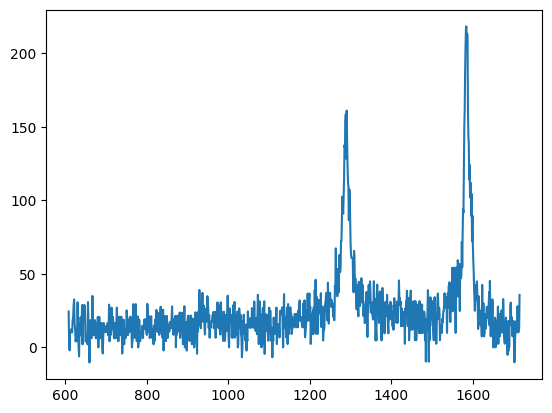

In [5]:
plt.plot(x, y)
plt.show()

In [6]:
def func(x, *params):
    
    #paramsの長さでフィッティングする関数の数を判別。
    num_func = int(len(params)/3)
    
    #ガウス関数にそれぞれのパラメータを挿入してy_listに追加。
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
        y_list.append(y)
        
    #y_listに入っているすべてのガウス関数を重ね合わせる。
    y_sum = np.zeros_like(x)
    for i in y_list:
        y_sum = y_sum + i
    
    #最後にバックグラウンドを追加。
    y_sum = y_sum + params[-1]
    
    return y_sum


In [7]:
def fit_plot(x, *params):
    num_func = int(len(params)/3)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2) + params[-1]
        y_list.append(y)
    return y_list


In [8]:
peak_init = []
peak_init.append([1000, 1590, 10]) # Gバンドピークの初期値
peak_init.append([1000, 1300, 10]) # Dバンドピークの初期値

background_init = 100

In [9]:
guess_total = []
for i in peak_init:
    guess_total.extend(i)
guess_total.append(background_init)

In [10]:
popt, pcov = curve_fit(func, x, y, p0=guess_total)
print(popt)

[ 173.73739016 1585.48056656   11.37794609  112.09640466 1289.18987108
   15.59269244   18.80869595]


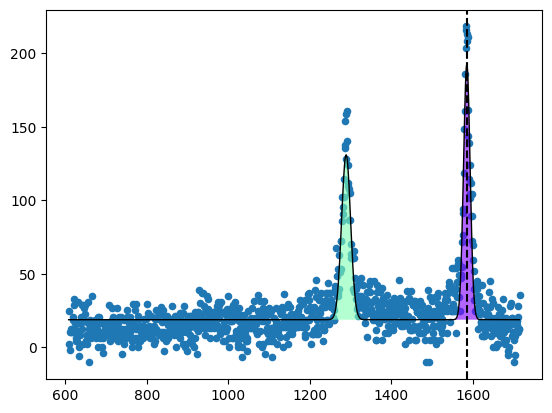

In [11]:
popt, pcov = curve_fit(func, x, y, p0=guess_total)

fit = func(x, *popt)
plt.scatter(x, y, s=20)
plt.plot(x, fit , ls='-', c='black', lw=1)

y_list = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n,i in enumerate(y_list):
    plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=0.6)

plt.axvline(x=popt[1], color='black', linestyle='--')